# Základní grafické operace – Numpy a Pillow

V těchto cvičeních budeme opět pracovat s obrázkem:

![Kvetina](images/kvetina/kvetina.jpg)

Byl vyfocen digitálním fotoaparátem a uložen v barvovém prostoru sRGB ve formátu JPEG. (A samozřejmě také výrazně zmenšen.) Jelikož úkolem tohoto cvičení je naučit se používat Numpy a další dostupné nástroje, pro načítání a ukládání už budeme používat metody knihovny Pillow.

Jsou-li k práci potřeba nějaké rovnice, jsou uvedeny v nápovědě (a také odkázány na zdroj), proto se jí nevyhýbejte.

In [1]:
from PIL import Image
import numpy as np

## Načtení obrázku

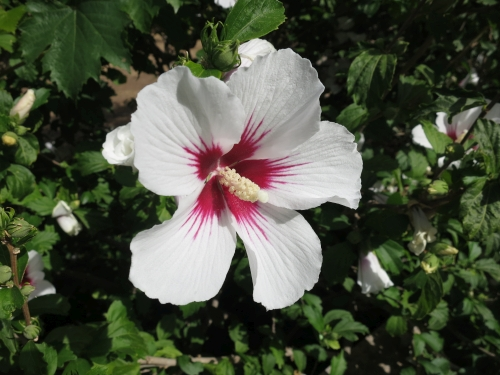

In [2]:
img = Image.open('images/kvetina/kvetina.jpg')
img

Pro převod `Image` objektu na `numpy` array lze použít `np.array` nebo `np.asarray`.

In [4]:
data = np.asarray(img, dtype=np.float64)
data.shape

(375, 500, 3)

Pro převod zpět na `Image` nejdříve pole přetypujte na pole celých čísel (8 bitové) a poté použijte [`Image.fromarray`](https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.fromarray).

In [5]:
def to_image(data):
    return Image.fromarray(np.uint8(data))


## 1. Převeďte uvedený obrázek z pozitivu do negativu.

**Nápověda:**

Tohle je asi první cvičení na broadcasting – potřebujeme všechny barvové složky v každém pixelu odečíst od 255 a nemusíme kvůli tomu vyrábět matici 375×500×3.

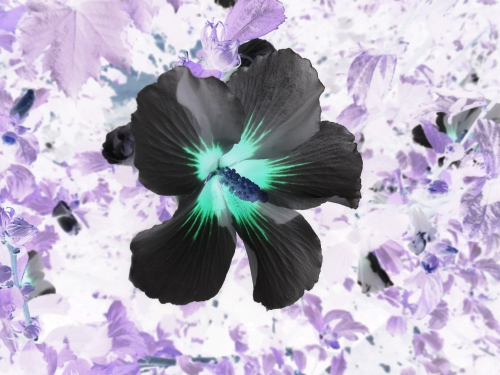

In [6]:
to_image(255 - data)

## 2. Převeďte uvedený obrázek do odstínů šedi - kvalitně to není tak jednoduché


**Nápověda:**

Pro převod použijte konverzní výraz podle ITU-R 601-2 luma transform pro převod z nelineárních hodnot R, G a B na tzv. lumu (nikoli tedy luminanci!):

$$Y_{601} = 0.299 * R + 0.587 * G + 0.114 * B$$

PS: Pro podrobnosti viz [What is "luma"?](http://www.poynton.com/notes/colour_and_gamma/ColorFAQ.html#RTFToC11).

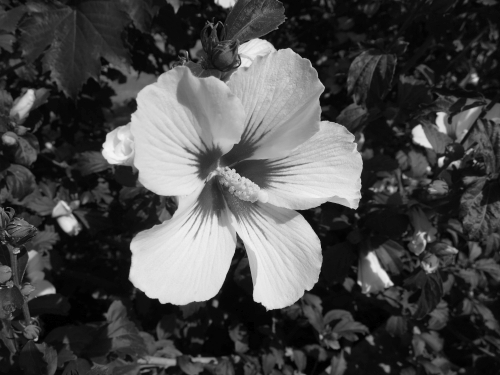

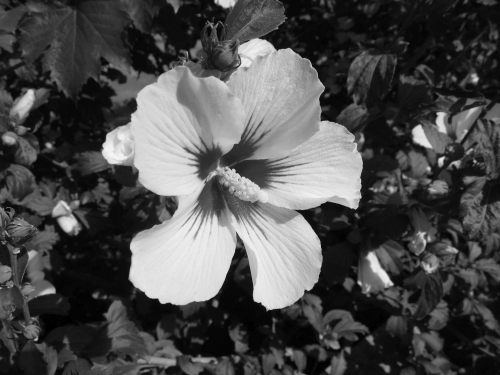

In [7]:
display(to_image(np.mean(data, axis=2)))

luma = data * [0.299, 0.587, 0.114]
res = np.sum(luma, axis=2)
to_image(res)


## 3. Nyní v rámci procvičení výřezů numpyovských polí vyextrahujte z originálního obrázku jednotlivé barevné kanály

**Nápověda:**

Jedna barvová složka představuje světlost v příslušném jednom barevném kanálu, proto se zobrazují v odstínech šedi. Čistě teoreticky si můžete dát tu práci a pokusit se je zobrazit v „přirozené“ barvě, ale jelikož to na webu umíme jenom přes plné RGB-spektrum, není to vůbec jednoduché.

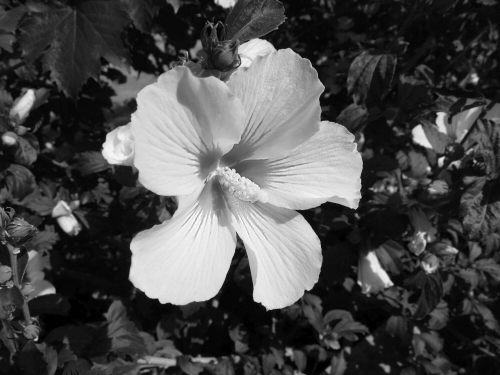

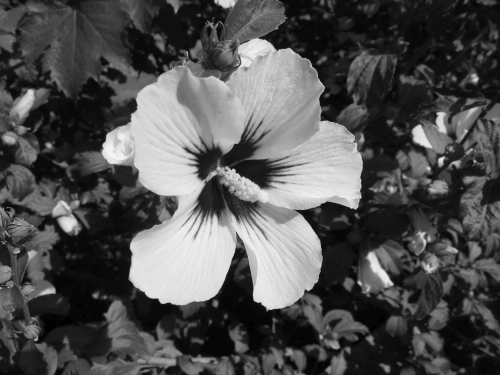

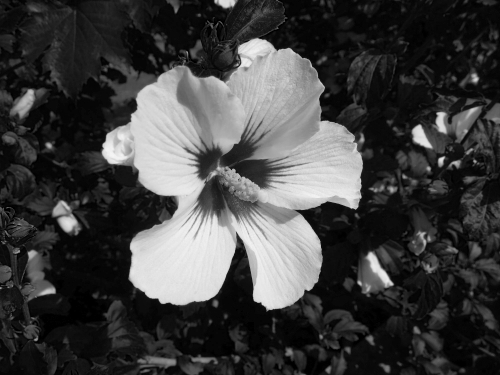

In [8]:
# TODO: Implement your solution.

k = data[:,:,0]
display(to_image(k))
k = data[:,:,1]
display(to_image(k))
k = data[:,:,2]
to_image(k)


## 4. Jako další procvičení na výřezy numpyovských polí zmenšete vstupní obrázek třebas na polovinu

**Nápověda:**

Při zmenšování jde o ztrátu informace a překvapivě se dá rozumných (tedy koukatelných) výsledků dosáhnout pouhým výběrem podmnožiny všech pixelů, což je smyslem této úlohy. Správně by se „zahazované“ pixely nějakým způsobem průměrovaly, ale to si necháme na jindy.

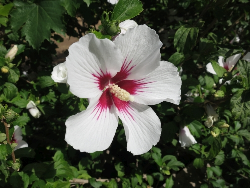

In [9]:
to_image(data[::2, ::2])

## 5. Jako další operaci na broadcasting zkuste originální obrázek ztmavit

**Nápověda:**

Ztmavit obrázek znamená zmenšit světlost v jeho jednotlivých barvových kanálech. V nejjednodušším případě ve všech stejně, jedná se tedy o broadcasting skaláru. Reálně by se spíše počítal každý kanál jiným koeficientem a šlo by tak o broadcasting vektorem, ale to si také necháme na jindy. (Natožpak pak ztmavování pomocí vhodné nelineární funkce.)

Mimochodem – při ztmavování obrázku pochopitelně začneme přicházet o informace, především ve stínech. Za prvé menší rozdíly asi nerozeznáme tak dobře a za druhé zmenšováním čísel blízko nuly můžeme informaci prostě ztratit i díky konečné přesnosti výpočtu. V praxi se snadno a rychle stane, že se tmavé plochy začnou za chvíli všechny mapovat na jednolitou černou.

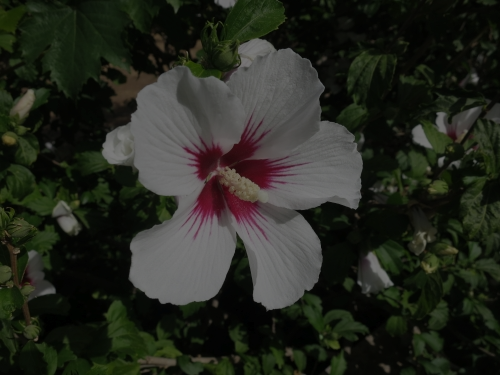

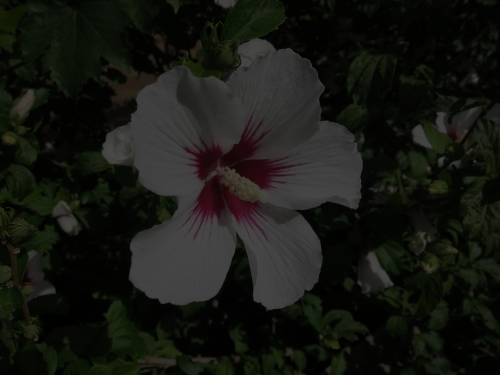

In [10]:
display(to_image(data * 0.5))

to_image(data * 0.3)

## 6. Doplňkovou operací ke ztmavení je zesvětlání

Pozor – tato úloha už není tak přímočará jako předchozí na ztmavení!

**Nápověda:**

Zcela naopak k předchozí úloze musíme nyní světlost v jednotlivých barvových kanálech zvětšit (a zase v zájmu zjednodušení použijeme pouze broadcasting skalárem místo vektorem nebo dokonce rovnou nějakou nelineární funkcí). Jenomže zatímco přibližovat se k nule jsme mohli bez nesnází, jen tak si zvětšovat čísla dost dobře nemůžeme – typický výstupní obrázek má na jeden barvový kanál vyhrazen pouze jeden bajt a do něj se vleze nejvyšší číslo 255. 

Je jasné, že vypočítané hodnoty musíme držet v rozmezí 0-255 a že tak při zesvětlování začneme ztrácet informace nejdříve z těch světlejších míst – prostě se dřív všechny namapují na čistou bílou. (A když to přeženete, tak tam kromě čisté černé namapujete úplně všechno.)

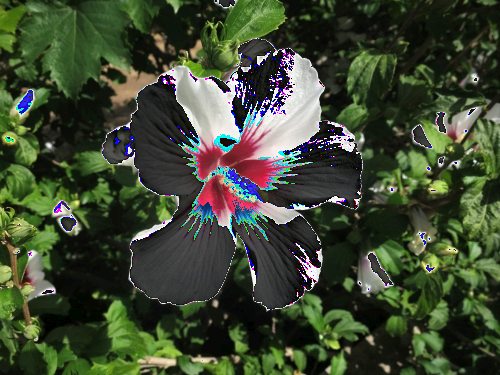

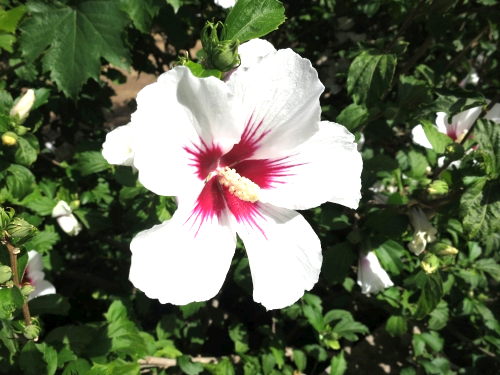

In [11]:
display(to_image(data * 1.4))
to_image(np.clip(data * 1.4, 0, 255))

## 7. Ať si vyzkoušíme také něco složitějšího než jen násobení skalárem – „vypněte“ ve výstupních obrázcích vždy jeden kanál a druhé dva zachovejte

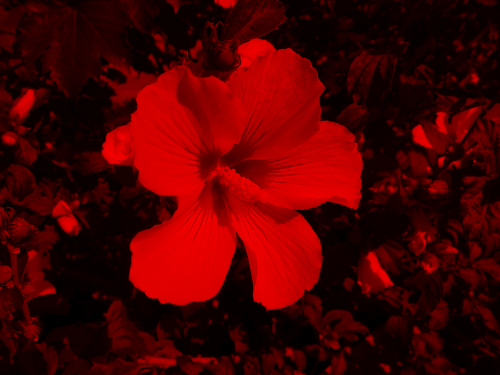

In [12]:
display(to_image(data * [1, 0, 0]))


## 8. Na závěr si zahrajeme na analogového fotografa vybaveného digitální technikou

Dostali jste barevný negativ a máte za úkol ho zkopírovat (tedy zachovat velikost) pomocí zvětšovacího přístroje se zeleným filtrem. Jelikož ale nemáte možnost změřit osvit pozitivu, musíte provést klasickou proužkovou zkoušku – rozdělit pozitiv na několik (obdélníkových) oblastí a postupným posouváním krycí masky po nich vyzkoušet, jak se délka osvitu projeví (samozřejmě pouze v dané části obrazu). Programově tedy:

* Výstupem je pozitiv, musíte proto barvy převést z negativu.
* Zelený filtr je ideální, ze tří barvových složek originálu tak použijete pouze zelený kanál.
* „Osvit“ testujte v pěti oblastech následujícím způsobem – prostřední část prostě zkopírujte, dvě krajní na jedné straně „podsviťte“ (tedy ztmavte) a druhé dvě krajní naopak „přesviťte“ (tedy zesvětlete).

V zájmu procvičení práce s numpy-poli spočítejte výstup pro horizontální i vertikální směr.

**Nápověda:**

Možná trochu zamotané, ale relativně přímočaré cvičení. Jen si dejte pozor, abyste nepřišli o originální obrázek – potřebujete ho pro dva výpočty.

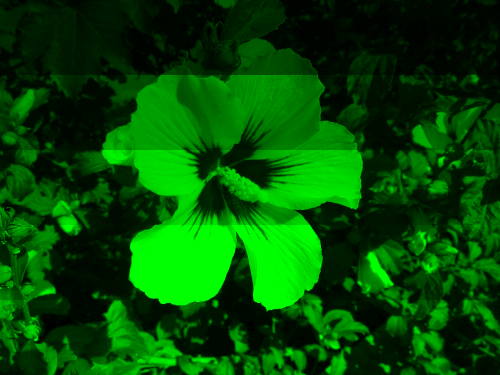

In [28]:
def clip(data):
    return np.clip(data, 0, 255)

greenData = data* [0, 1, 0]
fifth = int(len(greenData)/5)

to_image(
    np.concatenate([
        greenData[0:fifth]* 0.4,
        greenData[fifth:fifth*2]* 0.75,
        greenData[fifth*2:fifth*3],
        clip(greenData[fifth*3:fifth*4]*1.2),
        clip(greenData[fifth*4:fifth*5]*1.5)
        ]
    )
)
